In [166]:
import matplotlib.pyplot as plt
import numpy as np

from LightPipes import *
import math

In [167]:
n_map = np.load('pde_sol.npy')

In [168]:
labda=532*nm
size=2*mm
N=500
R=10*cm

In [169]:
d=np.ndarray((N,N))
X=np.arange(-size/2,size/2,size/N)
Y=X

for i in range(0, N-1):
    for j in range(0, N-1):
        r2 = X[i]*X[i] + Y[j]*Y[j]
        d[i][j] = r2 / 2 / R

In [170]:
def TheExample():
    global I
    F=Begin(size,labda,N)
    F1 = F
    Phi = Phase(F)
    k = 2 * math.pi / labda
    p2 = 2 * n_map * k
    for i in range(1, N):
         for j in range(1, N):
             Phi[i][j] = p2[i][j] * d[i][j] + math.pi
    F = SubPhase(Phi, F)
    F = BeamMix(F1, F)
    I = Intensity(1, F)
    return I
    

In [173]:
def circle_on_array(x_shape, y_shape, x0, y0, r):
    mask = np.zeros((x_shape, y_shape))
    
    for i in range(x_shape):
        for j in range(y_shape):
            if (x0 - i) ** 2 + (y0 - j) ** 2 <= r**2:
                mask[i][j] = 1
                
    return mask.astype(int)

mask_default =  np.ones((500, 500)) - circle_on_array(500, 500, 250, 250, 5/0.04)
mask_default = mask_default.astype(bool)

In [194]:
Image =  TheExample() 
Image[mask_default] = 0

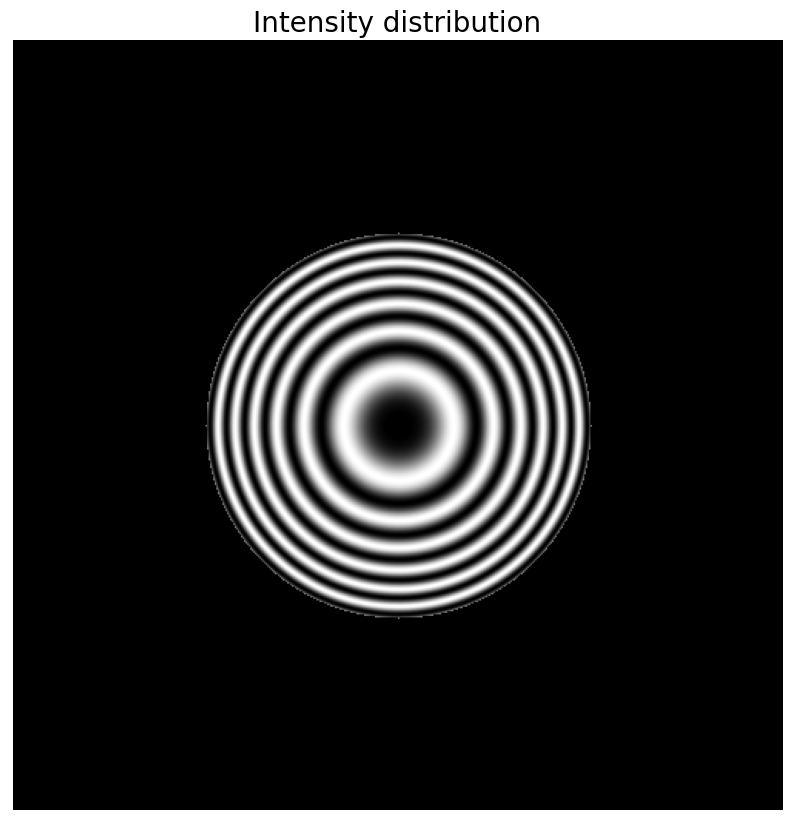

In [197]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.imshow(Image * -1, cmap='binary')

ax.axis('off')
ax.axis('equal')
str='Intensity distribution'
ax.set_title(str, fontsize=20)

plt.show()